In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from PIL import Image, ImageEnhance
from typing import *

In [2]:
def match_sift_features(features1, features2, descriptors1, descriptors2, rel_dist_match_thresh = 0.6):
    """ A brute force method for finding matches between two sets of SIFT features.

    Args:
        features1: A set of SIFT features.
        features2: A set of SIFT features.
    Returns:
        matches: A list of matches. Each match is a (feature, feature) tuples.
    """

    matches = list()
    mask = list()

    for idx1, (feature1, descriptor1) in enumerate(zip(features1, descriptors1)):
        min_dist = np.inf
        rest_min = np.inf
        min_feature = None

        for idx2, (feature2, descriptor2) in enumerate(zip(features2, descriptors2)):
            if idx2 in mask:
                continue
                
            dist = np.linalg.norm(descriptor1 - descriptor2)

            if dist < min_dist:
                min_dist = dist
                min_feature = feature2

            elif dist < rest_min:
                rest_min = dist

        if min_dist < rest_min * rel_dist_match_thresh:
            matches.append((feature1, min_feature))
            mask.append(idx2)

    return matches

def absolute_coordinate(kpt):
    y, x = kpt.pt
    return 0, int(x), int(y)

def visualize_matches(matches: List,
                      img1: np.ndarray,
                      img2: np.ndarray):
    """ Plots SIFT keypoint matches between two images.

    Args:
        matches: A list of matches. Each match is a (feature, feature) tuples.
        img1: The image in which the first match features were found.
        img2: The image in which the second match features were found.
    """

    coords_1 = [absolute_coordinate(match[0]) for match in matches]
    coords_1y = [coord[1] for coord in coords_1]
    coords_1x = [coord[2] for coord in coords_1]
    coords_1xy = [(x, y) for x, y in zip(coords_1x, coords_1y)]

    coords_2 = [absolute_coordinate(match[1]) for match in matches]
    coords_2y = [coord[1] for coord in coords_2]
    coords_2x = [coord[2] for coord in coords_2]
    coords_2xy = [(x, y) for x, y in zip(coords_2x, coords_2y)]

    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.imshow(img1, cmap='Greys_r')
    ax2.imshow(img2, cmap='Greys_r')

    ax1.scatter(coords_1x, coords_1y)
    ax2.scatter(coords_2x, coords_2y)

    for p1, p2 in zip(coords_1xy, coords_2xy):
        con = ConnectionPatch(xyA=p2, xyB=p1, coordsA="data", coordsB="data", axesA=ax2, axesB=ax1, color="red")
        ax2.add_artist(con)
    plt.show()
    return fig

In [3]:
from PIL import Image
from icecream import ic

ic| len(keypoints1): 426, len(keypoints2): 5569


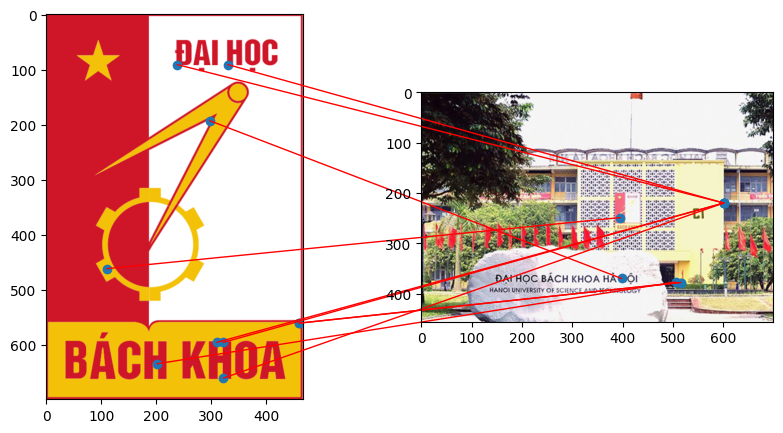

In [10]:
sift = cv2.SIFT_create()
img1 = Image.open("./../samples/logo-bk.png")
img1.thumbnail((700, 700))
img2 = Image.open("./../samples/bach-khoa.jpg")
img2.thumbnail((1000, 1000))
# img2 = ImageEnhance.Contrast(img2).enhance(1.5).convert("RGBA")
# img2 = ImageEnhance.Brightness(img2).enhance(0.5).convert("RGBA")
img1input = np.array(img1.convert("L"))
img2input = np.array(img2.convert("L"))
keypoints1, descriptors1 = sift.detectAndCompute(img1input, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2input, None)
ic(len(keypoints1), len(keypoints2))
matches = match_sift_features(keypoints1, keypoints2, descriptors1, descriptors2)
fig = visualize_matches(matches, img1, img2)

In [46]:
!pwd

/home/hung/Projects/HUST/MI6100/notebooks


In [45]:
fig.savefig("../figures/cup-in-scene-match-low-brn-high-contrast.png")

In [13]:
!mkdir ../figures

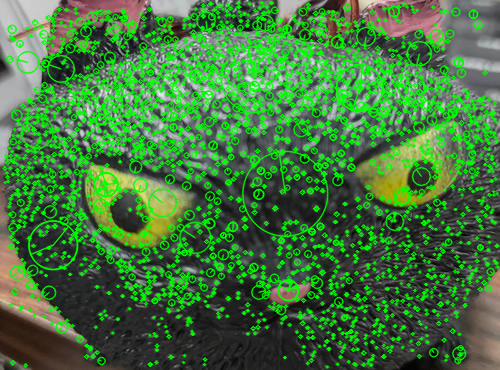

In [73]:
kpt_image_1 = cv2.drawKeypoints(img1, keypoints1, 0, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Image.fromarray(kpt_image_1)

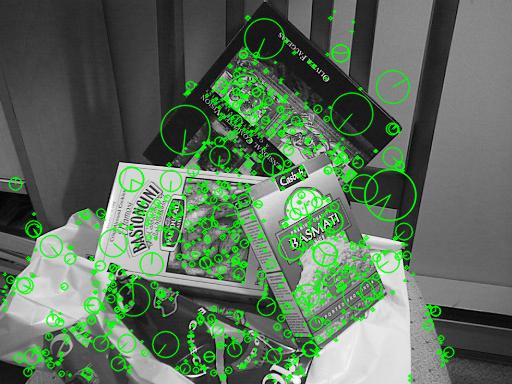

In [6]:
kpt_image_2 = cv2.drawKeypoints(img2, keypoints2, 0, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Image.fromarray(kpt_image_2)